#FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [ ]:
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
df = pd.read_csv('/content/foodhub_order.csv')

In [4]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
df.shape

(1898, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [7]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0




* There is no missing values in the data.



In [8]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
* Food preparation time ranges from miminum 20min to maximum 35min to preapre the order, with average 27 min and statndard deviation of 4.6 min.

* Delivery time ranges from minimum 15 min to maximum 33 min, with an average of 25 minutes.

* Cost of the order ranges from minimum 4.47 dollars to maximum 35.41 dollars.

In [9]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [10]:
df['rating'].value_counts()['Not given']

np.int64(736)

* The number of order not rated are 736.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Order ID

In [11]:
#Check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [12]:
#Check unique customer ID
df['customer_id'].nunique()

1200

#### Restaurant Name

In [13]:
#Check unique Restaurant Name
df['restaurant_name'].nunique()

178

#### Cuisine Type

In [14]:
#Check unique cuisine type
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

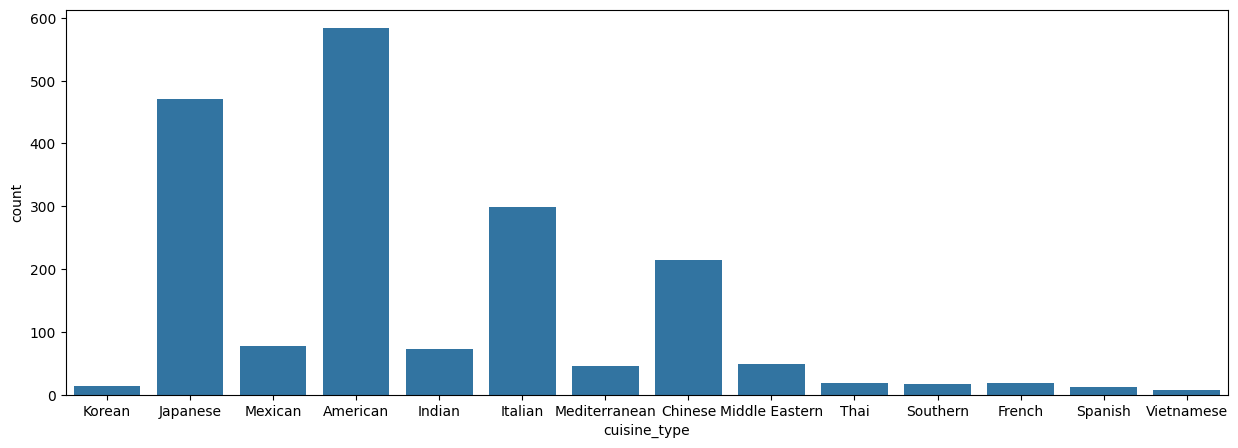

In [15]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

* Top 3 most popular cuisines in order are American, Japanese, and Italian.



#### Cost of the order

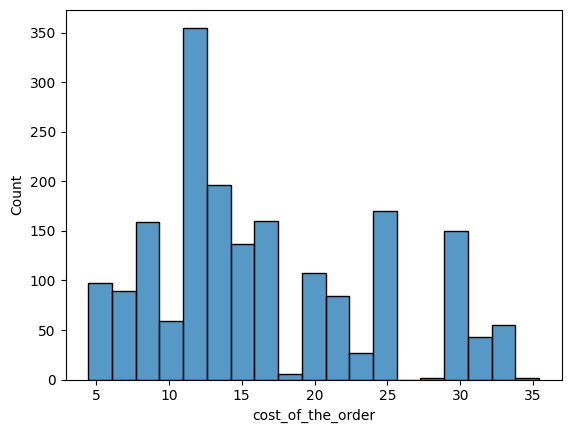

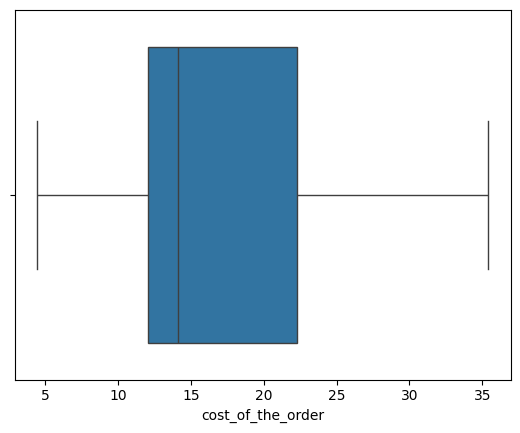

In [16]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')

* Each order costs 13 dollars average. Half of all orders are 10 to 20 dollar range.



#### Day Of the Week

In [17]:
#Check the unique values
df['day_of_the_week'].nunique()

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

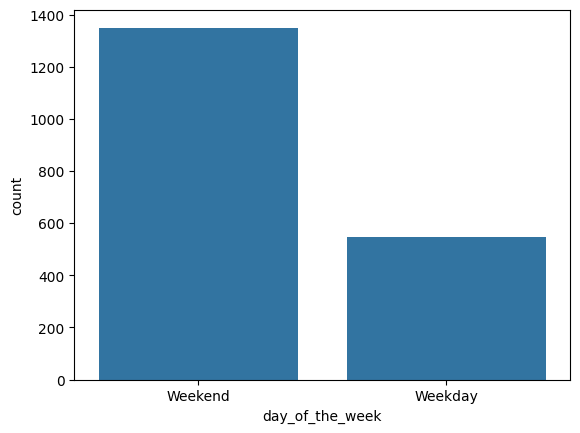

In [18]:
sns.countplot(data = df, x = 'day_of_the_week')

* Customers order more on Weekend than on Weekday. More than twice the number of weekday orders are placed during the weekend.

#### Rating

In [19]:
#Check the unique values
df['rating'].nunique()


4

<Axes: xlabel='rating', ylabel='count'>

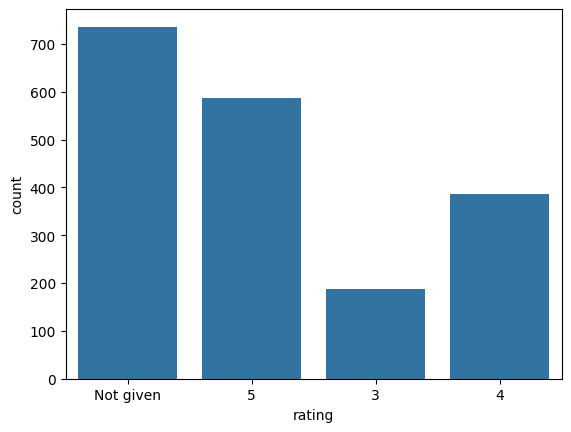

In [20]:
sns.countplot(data = df, x = 'rating')

* 580 people give 5 rating and not many people give rating.

#### Food Preparation Time

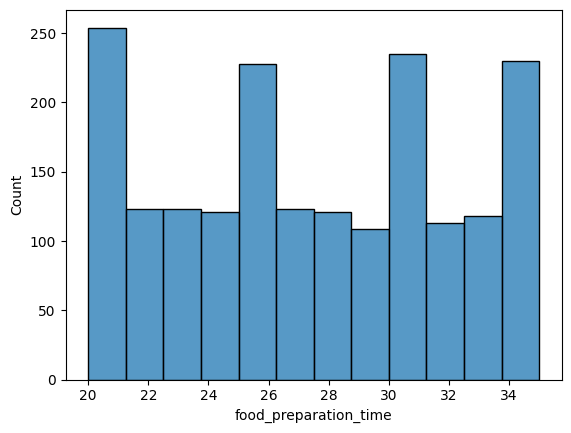

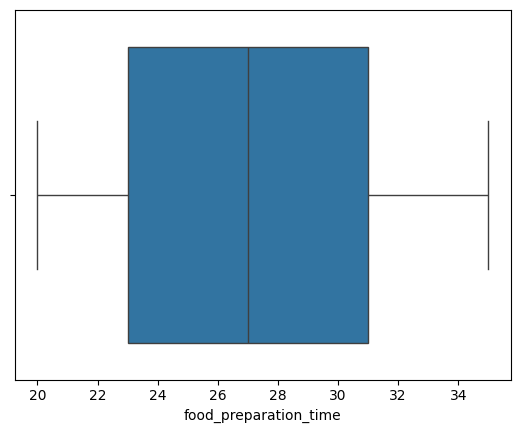

In [21]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')

* Food preparation time takes on average 27 minutes and preparation times are uniformly distributed between 20 and 35 minutes.

#### Delivery Time

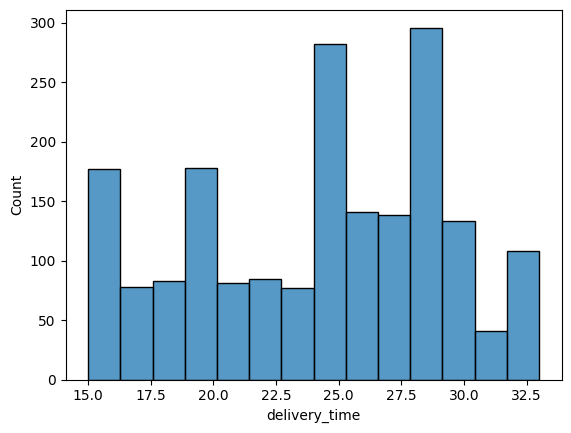

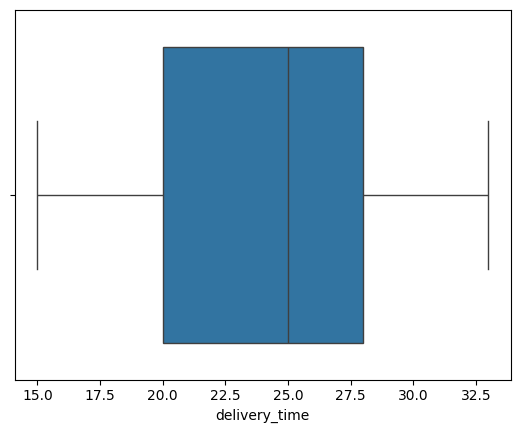

In [22]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')

* Delivery time taks on average of 25 minutes.Delivery times are uniformly distributed between 15 and 33 minutes.

In [24]:
#Top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


* Top 5 restaurant by number of orders are Shake Shack, The Meetball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm. Shake Shack has the top number of orders.



In [25]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


* American cuisine is the most popular on weekend.

In [26]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [43]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


In [28]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head(5)

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


### Multivariate Analysis

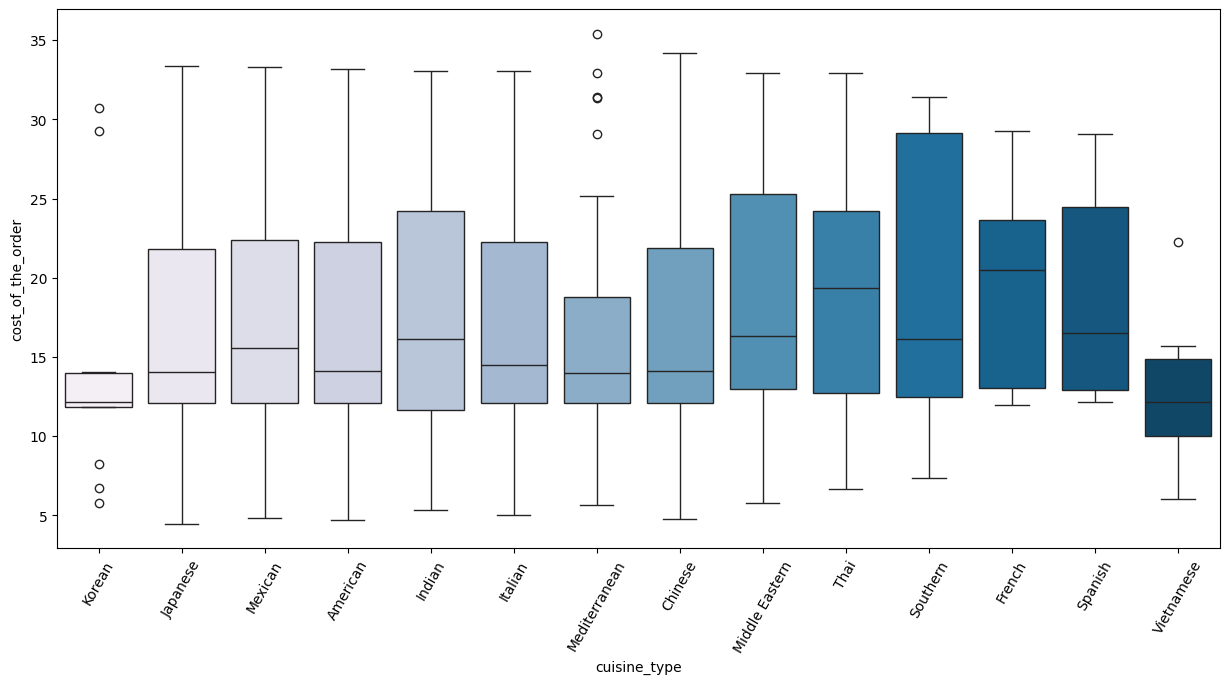

In [29]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

* The cuisine types Korean, Mediterranean and Vietnamese have outliers which could indicate out of the ordinary order costs because of large or small orders or potentially incorrectly entered data.

### Cuisine vs Food Preparation time

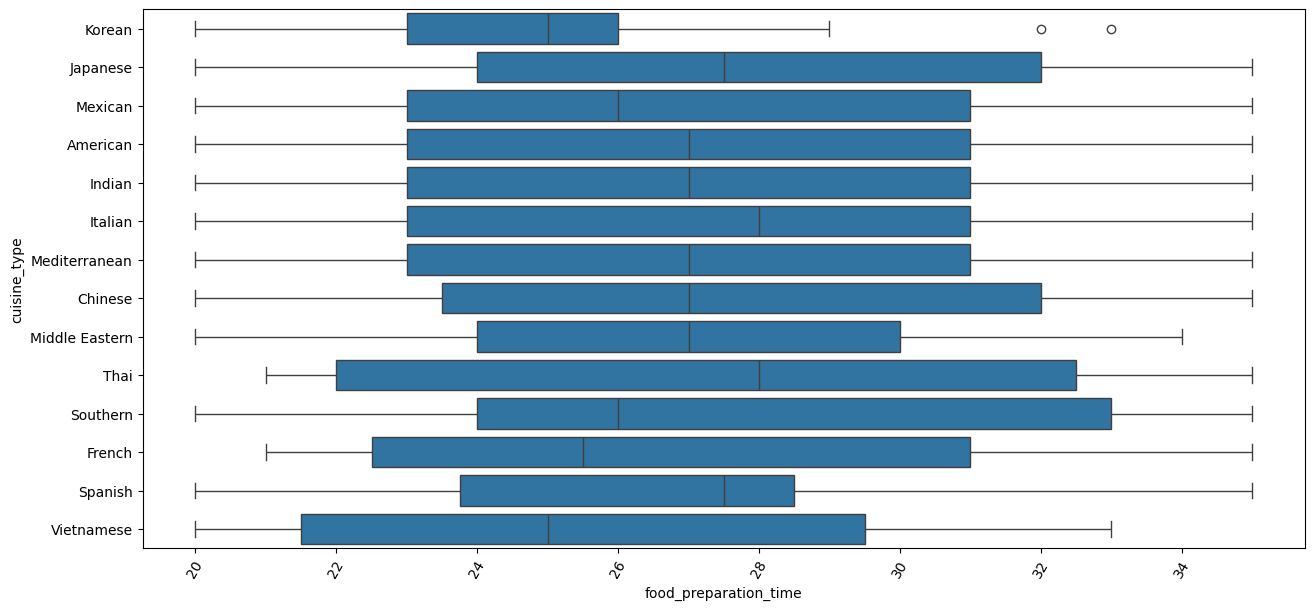

In [30]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'food_preparation_time', y = 'cuisine_type', data = df)
plt.xticks(rotation = 60)
plt.show()

* Food preparation times tend to be high across the board with each restaurant. The company should investigate why food preparation time is taking long. Whether does it large order or lack of human resources in the restaurants ?

* The highest cost of cuisine are French and Thai. The cost of Korean is the lowest.

### Day of the Week vs Delivery time

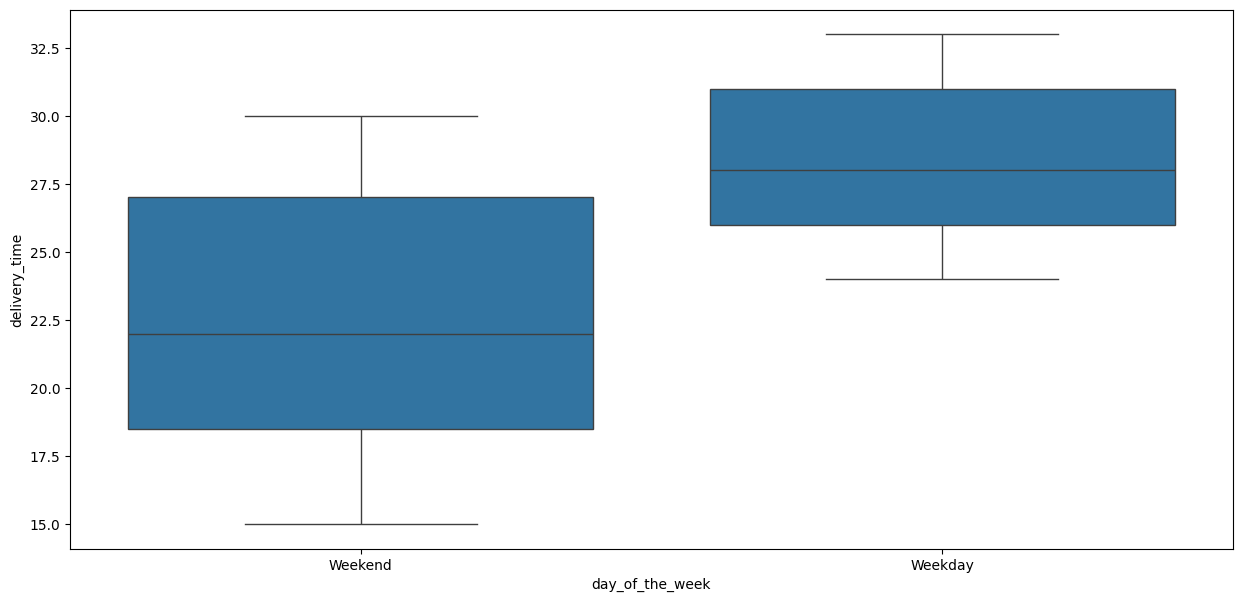

In [31]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df)


* The order takes 21 minutes on weekend and 28 minutes on weekday. Weekend delivery times are lower most likely because of the additional delivery resources that are used.

In [32]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


* The company should consider to investigate lower performing revenue restaurants as they could be costing more money for delivery times and the resources who deliver to customers.

### Rating vs Delivery time

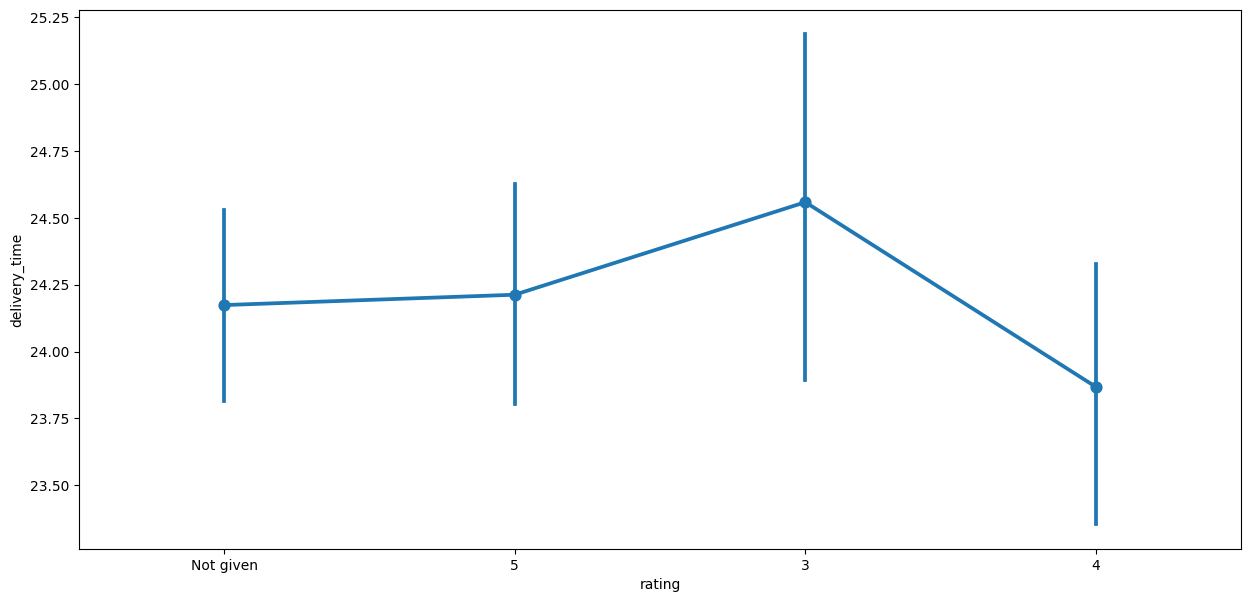

In [33]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

* Delivery times between 'Not given' and a top rating 5 do not vary much.The rating of 3 has the highest variablility with delivery time. The rating of 4 have a lower delivery time.

### Rating vs Food preparation time

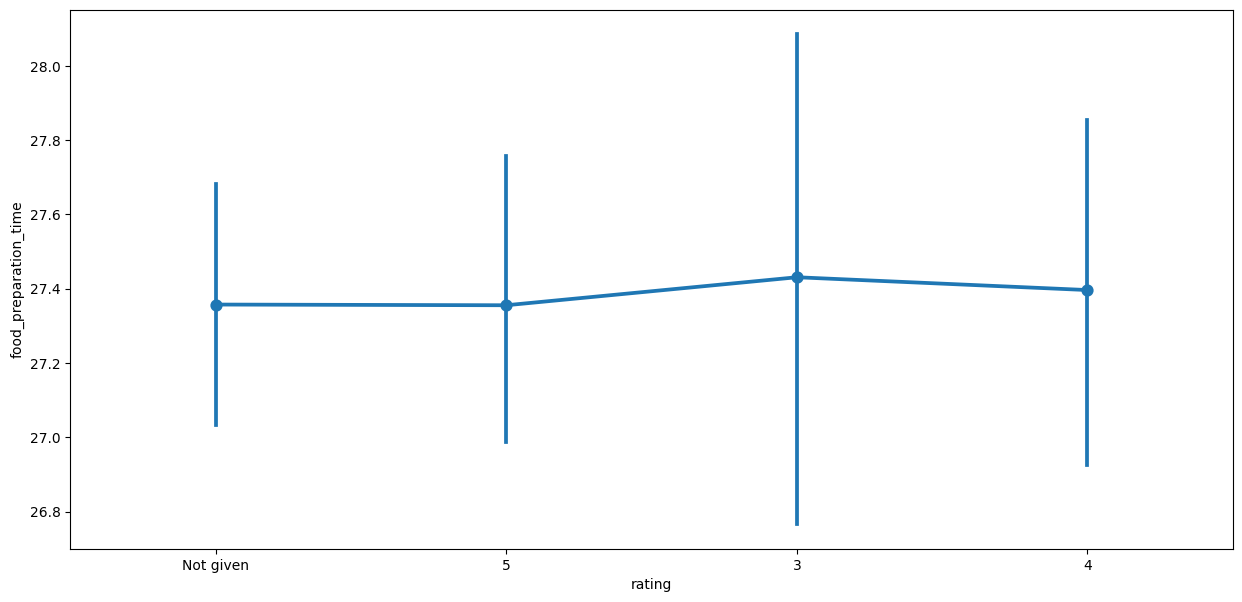

In [34]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

* The relationship of food preparation time and rating has low visibility. Delivery time is the most important indicator to customer for their order. A rating by customer is based on food preparation time and delivery time.

### Rating vs Cost of the order

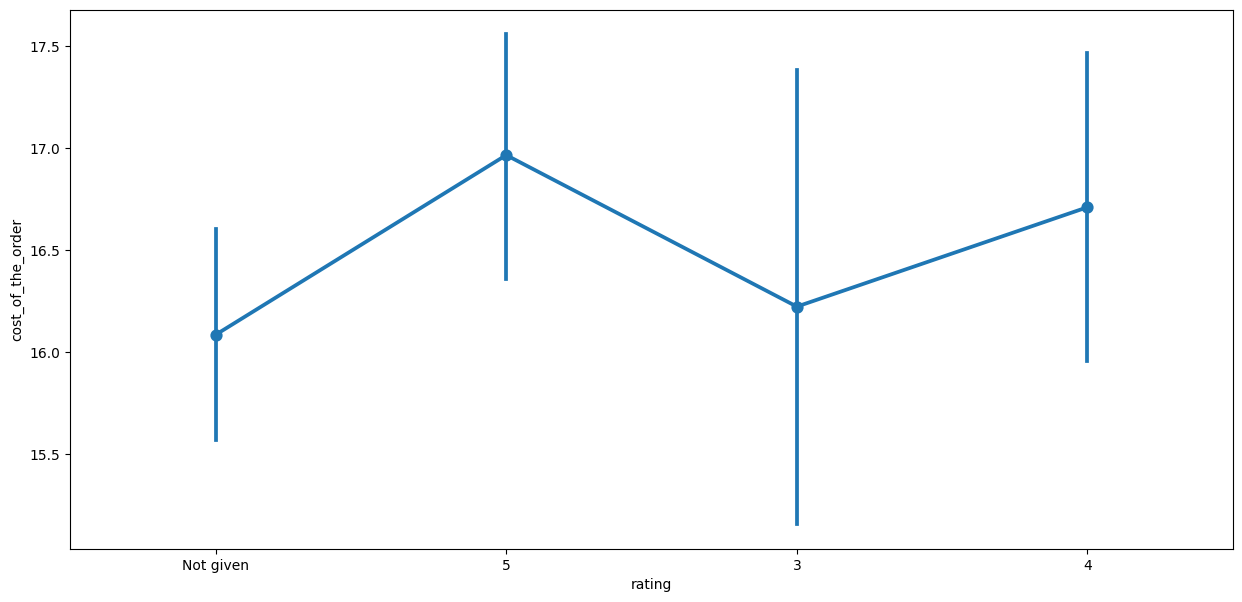

In [35]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)

* There is a high variablility with the order cost and rating.

### Correlation Among Variables

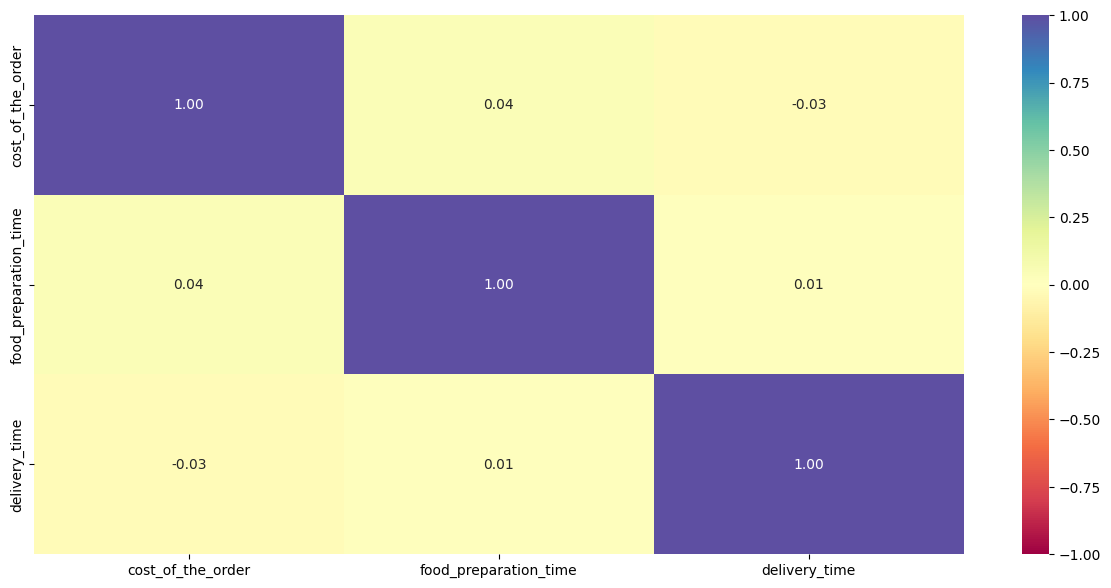

In [36]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



* Food preparation times and delivery times are all strongly correlated. Overall preparation time and delivery time are having the largest affect on ratings by customers.


In [37]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [38]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

# Filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)
df_avg_rating_greater_than_4


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

* Above are 4 restaurants that qualify for promotional offering. From there we can see that having more restaurants in the promotional offering will drive more net revenue.


In [40]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [41]:
df['total_time'] = df[df['delivery_time'] + df['food_preparation_time']> 60].shape[0]
## Find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
df['total_time_over'] = df[df['delivery_time'] + df['food_preparation_time'] >= 60].shape[0]

#Calculate the total number of orders in the dataset
df['total_orders'] = df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes to get delivered.
df['percentage_over_60_min'] = df['total_time']/ df['total_orders'] * 100
df['percentange_60_min_and_over'] = df['total_time_over'] / df['total_orders'] * 100

print(df['percentage_over_60_min'])
print(df['percentange_60_min_and_over'])

0       10.537408
1       10.537408
2       10.537408
3       10.537408
4       10.537408
          ...    
1893    10.537408
1894    10.537408
1895    10.537408
1896    10.537408
1897    10.537408
Name: percentage_over_60_min, Length: 1898, dtype: float64
0       12.908325
1       12.908325
2       12.908325
3       12.908325
4       12.908325
          ...    
1893    12.908325
1894    12.908325
1895    12.908325
1896    12.908325
1897    12.908325
Name: percentange_60_min_and_over, Length: 1898, dtype: float64


#### Observations:

* Total number of orders that take over 60 minutes to delivery and accounts for 10.54% of total orders.
* If we include orders that take exactly 60 minutes to get delivered, that accounts for 12.91% of the total orders.

In [42]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
## Get the mean delivery time on weekends and print it
print('The mean delivery time on weekend is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekend is around 22 minutes


### Conclusions:
*  Top 3 most popular cuisines in order are American, Japanese, and Italian.
* Each order costs 13 dollars average. Half of all orders are 10 to 20 dollar range.
* Customers order more on Weekend than on Weekday. More than twice the number of weekday orders are placed during the weekend.
* Food preparation time takes on average 27 minutes and preparation times are uniformly distributed between 20 and 35 minutes.
* Top 5 restaurant by number of orders are Shake Shack, The Meetball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm. Shake Shack has the top number of orders.
* American cuisine is the most popular on weekend.
* The highest cost of cuisine are French and Thai. The cost of Korean is the lowest.
* The company should consider to investigate lower performing revenue restaurants as they could be costing more money for delivery times and the resources who deliver to customers.
* Delivery times between 'Not given' and a top rating 5 do not vary much.The rating of 3 has the highest variablility with delivery time. The rating of 4 have a lower delivery time.

### Recommendations:

*  Encourage customers to provide feedbacks on ratings and giving them incentive to give for providing feedbacks. This will help Foodhub to understand more of what type of cuisine are doing well in the business.
* Cuisine types which has higher ratings can be featured on the app and fed into recommendation system which will help to improve customer experience.

---